# Wavelet:

In [161]:
#Importing the libraries to watch the 'fits' image and get the data array
import astropy
#import plotly.graph_objects as go
from astropy.io import fits
from sklearn.metrics import mean_squared_error
#Importing a library that is useful to read the original file
import pandas as pd
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
#Importing a visual library with some illustrative set up
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
from matplotlib import cm
import numpy as np
import math 
import pywt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (16, 8) 
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
plt.rcParams["axes.grid"] = False

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256))) 
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

In [162]:
data=pd.read_csv('day.csv',sep=';',header=None)
data=data.rename(columns={0:'Year',1:'Month',2:'Day',3:'Date',4:'Sunspot',5:'Std',6:'N',7:'isprov'})
data=data.drop(data[data['Sunspot']==-1].index)
data=data.drop(data[data.isprov==0].index)

In [166]:
data.head()

,Year,Month,Day,Date,Sunspot,Std,N,isprov
7,1818,1,8,1818.021,65,10.2,1,1
12,1818,1,13,1818.034,37,7.7,1,1
16,1818,1,17,1818.045,77,11.1,1,1
17,1818,1,18,1818.048,98,12.6,1,1
18,1818,1,19,1818.051,105,13.0,1,1


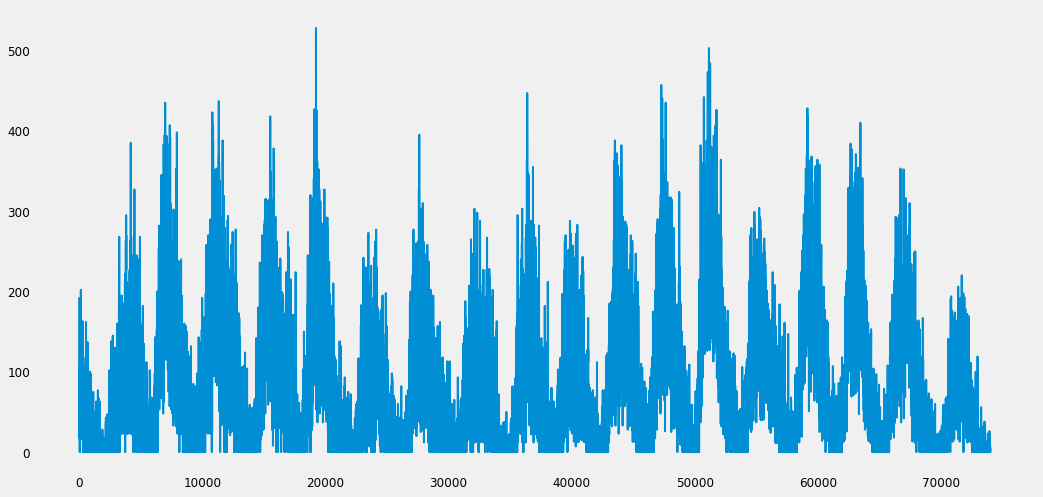

In [167]:

plt.plot(data.Sunspot)

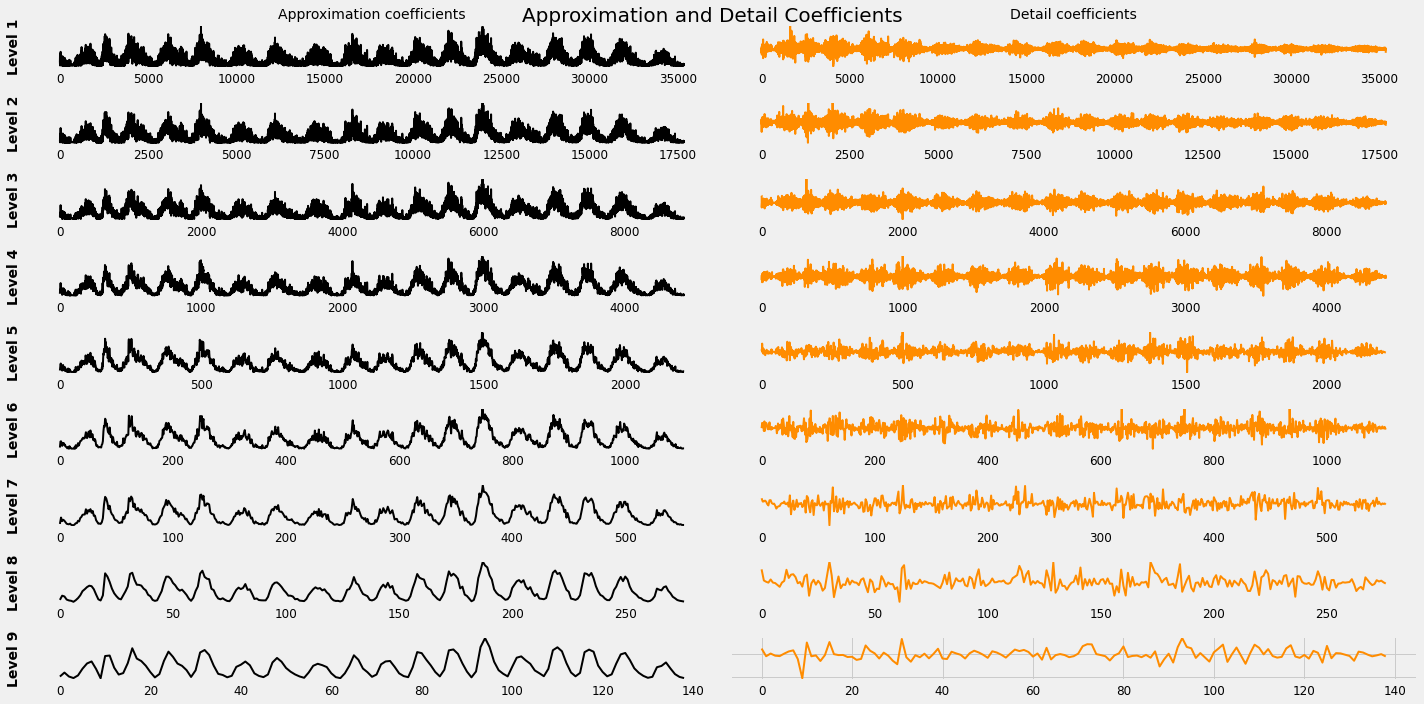

In [168]:
#indices=np.arange(96*10,96*17,1)
#power=2**18
week=data
time=week.Date.max()
sample_rate=1/900.
size= int(sample_rate*time)
t = np.linspace(0, time, num=size)
dataset = np.array(week.Sunspot.tolist())
waveletname = 'sym2'
levels=9
fig, axarr = plt.subplots(nrows=levels, ncols=2, figsize=(20,10))
COEFF_D=[]
DATASET=[]
k=1
for ii in range(levels):
    (dataset, coeff_d) = pywt.dwt(dataset, waveletname,mode='per')
    axarr[ii, 0].plot(dataset, 'k')
    axarr[ii, 1].plot(coeff_d, 'darkorange')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    plt.grid(True)
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
    plt.grid(True)
    #print(len(coeff_d))
    COEFF_D.append(np.repeat(coeff_d,2**k))
    DATASET.append(np.repeat(dataset,2**k))
    k=k+1
plt.tight_layout()
plt.suptitle('Approximation and Detail Coefficients',fontsize=20)
plt.show()

In [169]:
error=DATASET[0]-data.Sunspot

In [171]:
corr=np.corrcoef(error,data.Sunspot)[0][1]

In [172]:
print(' The correlation of the dataset with the error is: ' + str(corr*100)+ '%')

 The correlation of the dataset with the error is: 77.18065241651058%


In [173]:
from sklearn.metrics import mean_squared_error as mse

In [174]:
print ('The RMSE is the ' + str(np.sqrt(mse(error,data.Sunspot))/data.Sunspot.max()*100) + '% of the maximum value')

The RMSE is the 13.757128824106903% of the maximum value


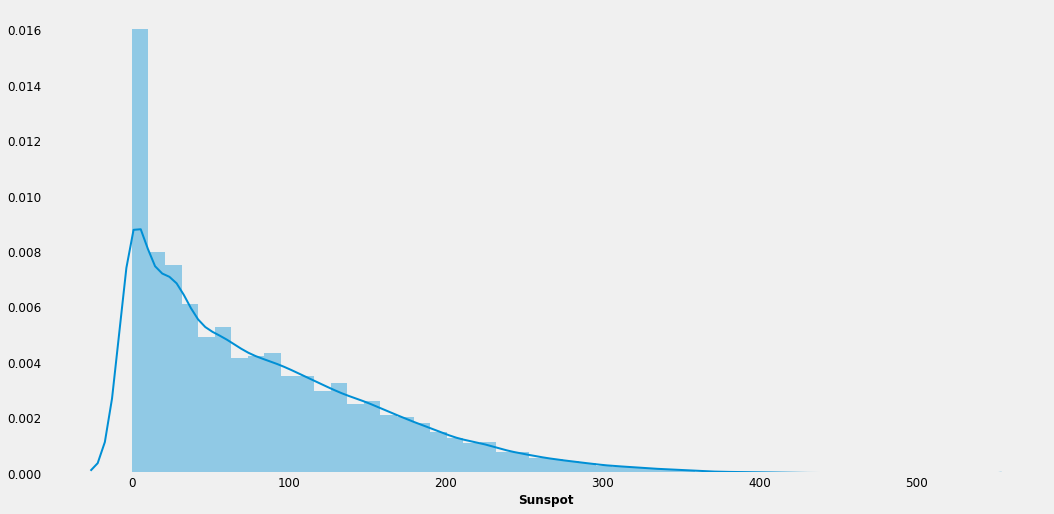

In [175]:
sns.distplot(data.Sunspot)

In [176]:
y=[7.97734322e-03, 7.51935239e-03, 6.11725765e-03,
       4.91737524e-03, 5.28966018e-03, 4.17548366e-03, 4.22637153e-03,
       4.34287797e-03, 3.49787149e-03, 3.52331543e-03, 2.96354886e-03,
       3.25682369e-03, 2.49082733e-03, 2.61536869e-03, 2.09042014e-03,
       2.01676664e-03, 1.81857178e-03, 1.47708739e-03, 1.26416183e-03,
       1.09275005e-03, 1.14497708e-03, 7.74031288e-04, 7.68674670e-04,
       5.37000945e-04, 5.06200392e-04, 4.49955904e-04, 3.56215091e-04,
       2.78544131e-04, 2.41047806e-04, 2.28995416e-04, 1.49985301e-04,
       1.56681074e-04, 1.05793204e-04, 6.16011059e-05, 5.62444880e-05,
       4.95487157e-05, 3.74963254e-05, 2.27656261e-05, 1.60698537e-05,
       1.74090082e-05, 9.37408134e-06, 6.69577239e-06, 4.01746343e-06,
       4.01746343e-06, 5.35661791e-06, 1.33915448e-06, 2.67830895e-06,
       0.000001e+00, 4.01746343e-06]

In [177]:
x=[  10.56,  21.12,  31.68,  42.24,  52.8 ,  63.36,  73.92,
        84.48,  95.04, 105.6 , 116.16, 126.72, 137.28, 147.84, 158.4 ,
       168.96, 179.52, 190.08, 200.64, 211.2 , 221.76, 232.32, 242.88,
       253.44, 264.  , 274.56, 285.12, 295.68, 306.24, 316.8 , 327.36,
       337.92, 348.48, 359.04, 369.6 , 380.16, 390.72, 401.28, 411.84,
       422.4 , 432.96, 443.52, 454.08, 464.64, 475.2 , 485.76, 496.32,
       506.88, 517.44  ]
y=np.array(y)
x=np.log(np.array(x))
x=x.reshape(-1,1)
y=np.log(y)
#y=y.reshape(-1,1)


In [178]:
y=y-y.min()

In [179]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(10)
X=poly.fit_transform(x)
reg = LinearRegression().fit(X,y )


In [180]:
reg = LinearRegression().fit(X,y )

reg.score(X,y)


#reg.coef_*X+reg.intercept_

0.9936576753737058

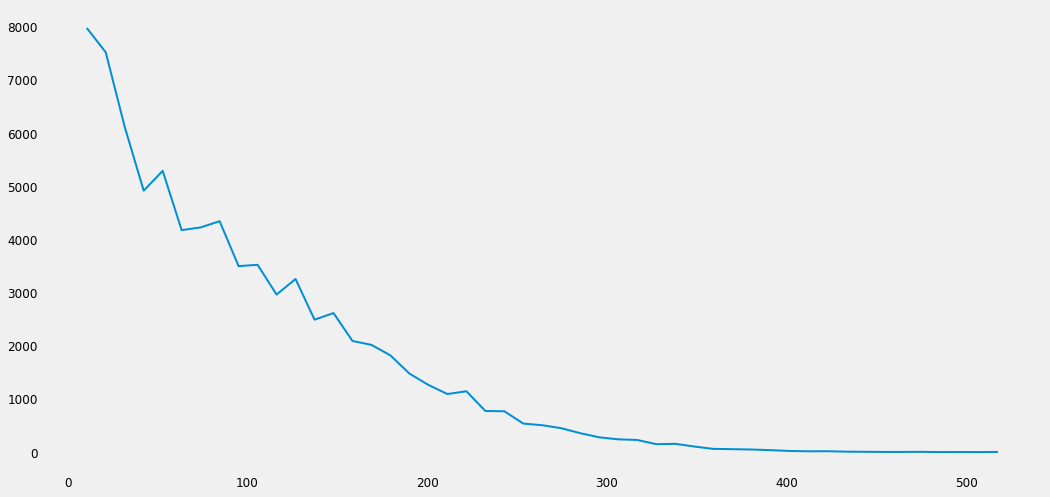

In [181]:
plt.plot(np.exp(x),np.exp(y))


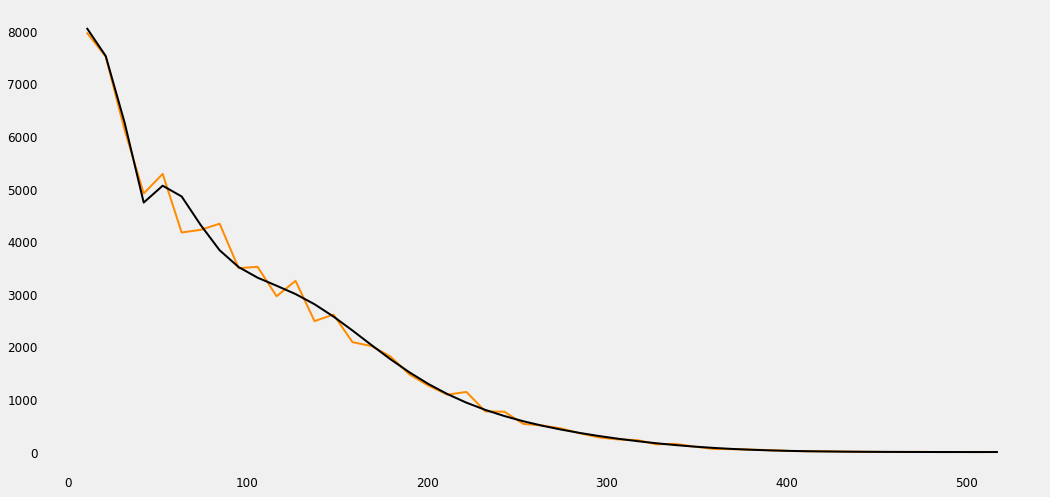

In [182]:
plt.plot(np.exp(x),np.exp(y),color='darkorange')
plt.plot(np.exp(x),np.exp(reg.predict(X)),color='black')
#plt.xlim(0,1.)

# Periodic data:

In [614]:
data=pd.read_csv('year.csv',sep=';',header=None)

Column 1: Gregorian calendar year (mid-year date)
Column 2: Yearly mean total sunspot number.
Column 3: Yearly mean standard deviation of the input sunspot numbers from individual stations.
Column 4: Number of observations used to compute the yearly mean total sunspot number.
Column 5: Definitive/provisional marker. '1' indicates that the value is definitive. '0' indicates that the value is still provisional.

In [615]:
data.tail()

,0,1,2,3,4
315,2015.5,69.8,6.4,8903,1
316,2016.5,39.8,3.9,9940,1
317,2017.5,21.7,2.5,11444,1
318,2018.5,7.0,1.1,12611,1
319,2019.5,3.6,0.5,12884,1


In [616]:
data=data.rename(columns={0:'Year',1:'Sunspot',2:'Sd',3:'N',4:'isprov'})

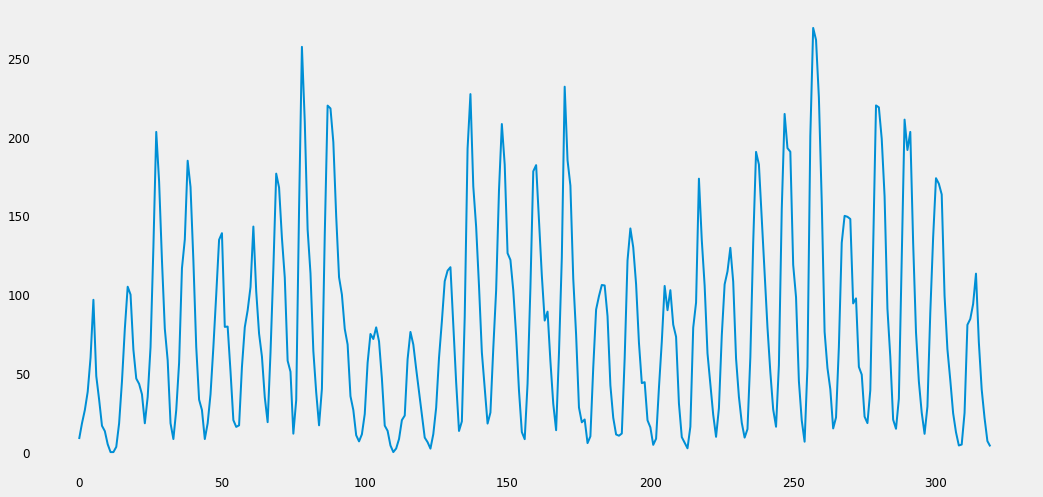

In [613]:
plt.plot(data.Sunspot)

In [188]:
under=np.array(data.Sunspot)
year=np.array(data.Year)
MIN=[]
VALUE=[]
YEAR=[]
for i in range(1,len(under)-1):
    value=under[i]
    if value<under[i-1] and value<=under[i+1]:
        MIN.append(i)
        VALUE.append(value)
        YEAR.append(year[i])

In [189]:
datapoint=pd.DataFrame({'V':VALUE,'M':MIN,'Year':YEAR})

In [190]:
datapoint=datapoint.drop(datapoint[datapoint['V']>40].index)

In [191]:
datapoint=datapoint.drop(datapoint[datapoint['M']==176].index)

In [192]:
year=np.array(datapoint.Year)
V=np.array(datapoint.V)

In [193]:
datapoint['yeardiff']=datapoint.Year.diff()

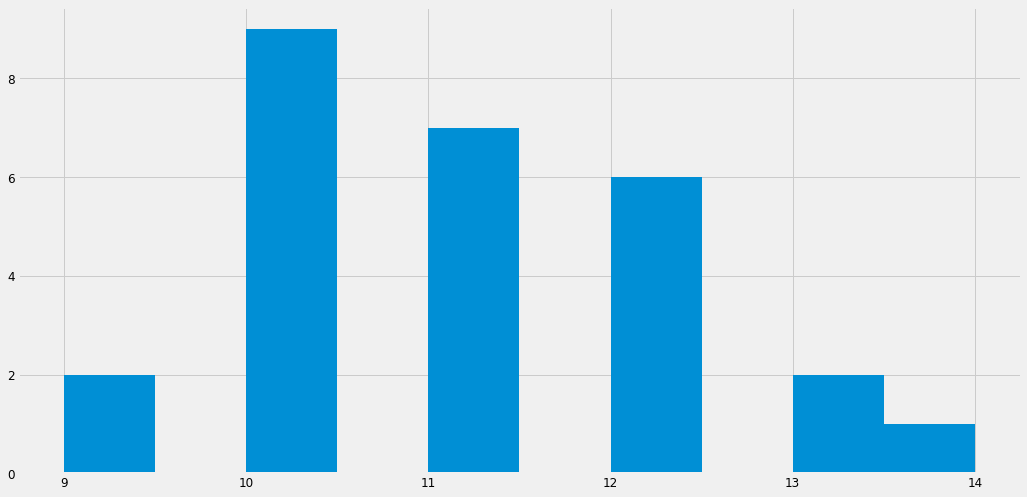

In [194]:
datapoint.yeardiff.hist()

In [195]:
MINV=np.array(datapoint.V)

In [196]:
MAX=[]
MIN=np.array(datapoint.M)

In [197]:
ARGMAX=[]
for m in range(len(MIN)-1):
    MAX.append(under[MIN[m]:MIN[m+1]].max())
    ARGMAX.append(under[MIN[m]:MIN[m+1]].argmax()+MIN[m])

In [198]:
MAX.append(under[MIN[m+1]::].max())
ARGMAX.append(under[MIN[m+1]::].argmax()+MIN[m+1])

In [199]:
MAX=np.array(MAX)
#ARGMAX=np.array(ARGMAX)

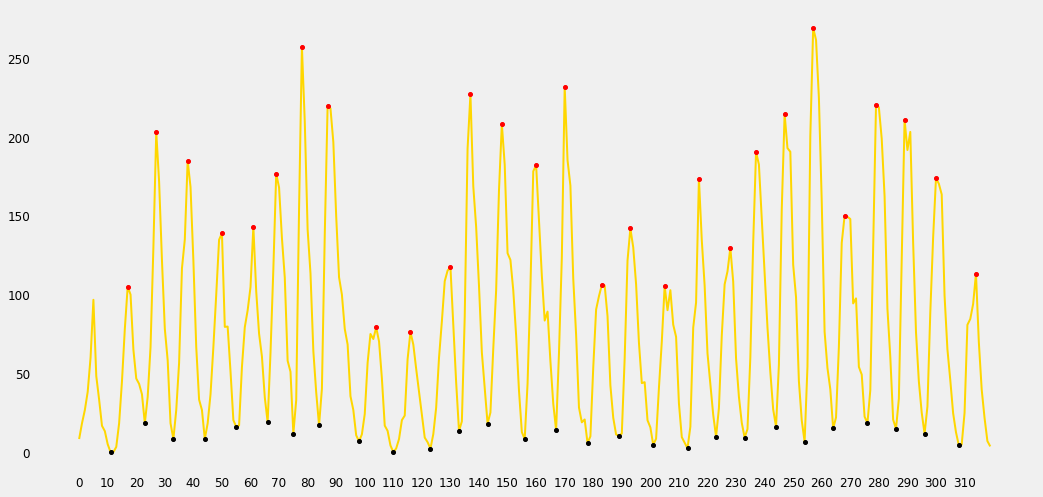

In [200]:
plt.plot(under,color='gold')
plt.xticks(np.arange(0,len(under),10))
plt.plot(ARGMAX,MAX,'.',color='red')
plt.plot(MIN,MINV,'.',color='black')

In [201]:
max_data=pd.DataFrame({'i':ARGMAX,'value':MAX})

# Cycle Exploration

In [812]:
data=pd.read_csv('day.csv',sep=';',header=None)
data=data.rename(columns={0:'Year',1:'Month',2:'Day',3:'Date',4:'Sunspot',5:'Std',6:'N',7:'isprov'})
#data['Sunspot']=data.Sunspot+3*np.ones(len(data))
#data=data.drop(data[data['Sunspot']==-1].index)
#data=data.drop(data[data.isprov==0].index)

In [799]:
C_YEAR=datapoint.Year.astype(int).tolist()

In [800]:
c_data=data.copy()
comp_year=c_data.Year.drop_duplicates().tolist()

In [801]:
C_YEAR=np.array(C_YEAR)
C_YEAR=C_YEAR[C_YEAR>=comp_year[0]]

In [802]:
start=np.arange(comp_year[0],C_YEAR[0],1)

C_data variable takes away everything that is not in C_YEAR variable (i.e. all the years that are in the range 1818-1823)

In [803]:
for y in start:
    c_data=c_data.drop(c_data[c_data['Year']==y].index)

In [807]:
c_data.Sunspot.min()

2.0

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


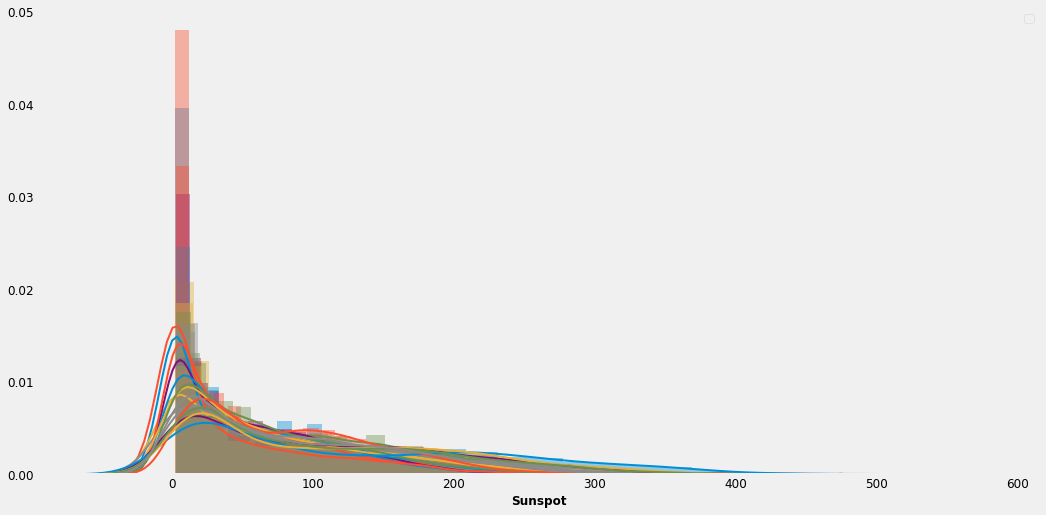

In [805]:
for y in range(len(C_YEAR)-1):
    cicle=c_data[(c_data['Year']>=C_YEAR[y]) & (c_data['Year']<=C_YEAR[y+1])]
    x=np.histogram(cicle.Sunspot,bins=100)[1][0:100]
    y=np.histogram(cicle.Sunspot,bins=100)[0]
    sns.distplot(cicle.Sunspot)
    plt.legend()

In [903]:
N_FEAT=np.arange(0,13,1)
RMSE=[]
N=[]
Y_MAX=[]
PRED_N=[]
Y_N=[]
YEAR=[]
COEF_N=[]
X_TOT=[]
for n in N_FEAT:
    PRED=[]
    COEF=[]
    Y=[]
    X_=[]
    for j in range(len(C_YEAR)-2):
        cicle=c_data[(c_data['Year']>=C_YEAR[j]) & (c_data['Year']<=C_YEAR[j+1])]
        x=np.histogram(cicle.Sunspot,bins=100)[1][0:100].astype(float)
        y=np.histogram(cicle.Sunspot,bins=100)[0].astype(float)+2
        #y=y+1
        #x=x+1
        #y=np.array(y)
        x=np.log(x)
        #print(y)
        x=x.reshape(-1,1)
        y=np.log(y)
        X_.append(np.exp(x))
        y=y.reshape(-1,1)
        y_min=y.min()
        #y=y-y.min()
        poly = PolynomialFeatures(n)
        X=poly.fit_transform(x)
        reg = LinearRegression().fit(X,y )
        pred=reg.predict(X)
        #print(len(pred),len(X))
        PRED.append(np.exp(pred-2))
        
        coef=[reg.intercept_[0]]
        for c in range(1,len(reg.coef_[0])):
            coef.append(reg.coef_[0][c])
        COEF.append(coef)
        RMSE.append(np.sqrt(mse(np.exp(pred-2),np.exp(y-2))))
        Y_MAX.append(np.max(np.exp(y-2)))
        Y.append(np.exp(y-2))
        N.append(n)
        YEAR.append(C_YEAR[j])
    X_TOT.append(X_)
    PRED_N.append(PRED)
    COEF_N.append(COEF)
    Y_N.append(Y)


In [904]:
res=pd.DataFrame({'RMSE':RMSE,'YEAR':YEAR,'PolynomialFeature':N,'Max':Y_MAX,'Percentage':np.array(RMSE)/np.array(Y_MAX)})


In [905]:
res.loc[res.RMSE==res.RMSE.min()]

,RMSE,YEAR,PolynomialFeature,Max,Percentage
191,1.01793,1986,11,57.246825,0.017781


In [906]:
res.sort_values(by='RMSE').head()

,RMSE,YEAR,PolynomialFeature,Max,Percentage
191,1.017930,1986,11,57.246825,0.017781
207,1.020675,1986,12,57.246825,0.017829
159,1.033822,1986,9,57.246825,0.018059
143,1.033924,1986,8,57.246825,0.018061
175,1.050083,1986,10,57.246825,0.018343


In [907]:
res.sort_values(by='RMSE').tail()

,RMSE,YEAR,PolynomialFeature,Max,Percentage
24,25.944350,1913,1,117.606361,0.220603
33,27.045192,1833,2,271.211908,0.099720
1,27.330568,1833,0,271.211908,0.100772
20,30.467302,1867,1,141.560706,0.215224
22,42.904874,1889,1,145.891435,0.294088


In [908]:
MEAN_RMSE=[]
for n in N_FEAT:
    MEAN_RMSE.append(res[res['PolynomialFeature']==n].RMSE.mean())

In [909]:
MEAN_RMSE=np.array(MEAN_RMSE)
min_mod=MEAN_RMSE.argmin()+6
min_rmse=MEAN_RMSE.min()

In [910]:
print (' The best model on training set is ' + str(min_mod)+' with mean RMSE = '+str(min_rmse))

 The best model on training set is 17 with mean RMSE = 2.285425621899942


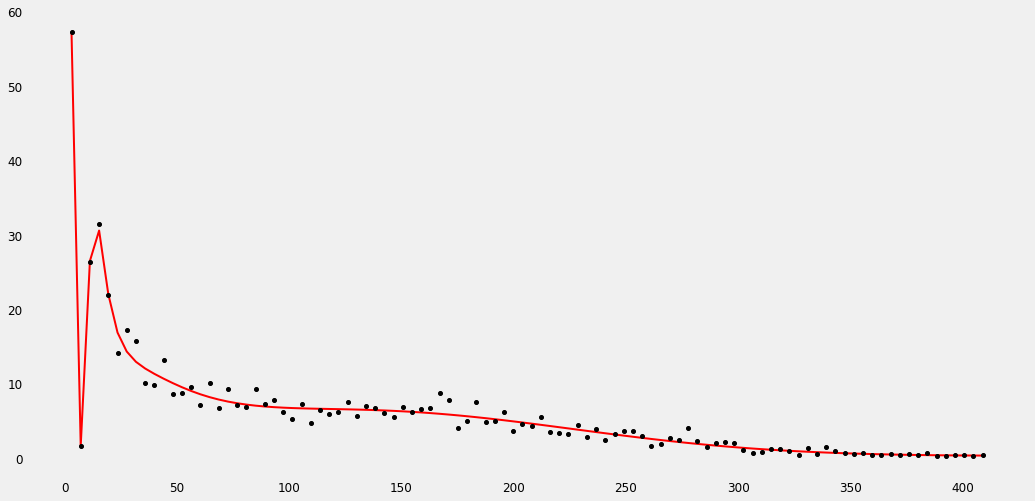

In [914]:
plt.plot(X_[len(PRED)-1],PRED[len(PRED)-1],color='red')
plt.plot(X_[len(PRED)-1],Y[len(PRED)-1],'.k')

In [897]:
MODELS=[]
for c in range(len(COEF_N)):
    model=np.zeros(len(COEF_N[c][0]))
    for y in range(len(COEF_N[c])):
        model=model+COEF_N[c][y]
    MODELS.append(model/16)

In [898]:
def make_prediction(degree):
    x=np.histogram(cicle.Sunspot,bins=50)[1][0:50].astype(float)
    x=np.log(x+1)
    y=np.histogram(cicle.Sunspot,bins=50)[0].astype(float)
    pred=MODELS[degree][0]
    for i in range(1,degree+1):
        pred=pred+x**i*MODELS[degree][i]
    return pred

In [961]:
PRED=[]
RMSE=[]

cicle=c_data[(c_data['Year']>=C_YEAR[j+1]) & (c_data['Year']<=C_YEAR[j+2])]
x=np.histogram(cicle.Sunspot,bins=50)[1][0:50].astype(float)
y=np.histogram(cicle.Sunspot,bins=50)[0].astype(float)
y=y+1
#x=x+1
#y=np.array(y)
x=np.log(x)
#print(y)
x=x.reshape(-1,1)
y=np.log(y)
Y=[]
#y=y.reshape(-1,1
for n in range(1,len(N_FEAT)):
    y=y-y.min()
    poly = PolynomialFeatures(N_FEAT[n])
    pred=make_prediction(N_FEAT[n])
    RMSE.append(np.sqrt(mse(pred,y)))
   # plt.plot(pred)
   # plt.plot(y,color='black')
    PRED.append(pred)
    Y.append(y.max())
        

    

In [962]:
RMSE=np.array(RMSE)
PERC=RMSE/y.max()

In [963]:
PERC

array([0.15759001, 0.12354691, 0.09990234, 0.11176044, 0.11579768,
       0.1364498 , 0.11999677, 0.14181134, 0.1483038 , 0.31976284,
       0.69234952, 0.42171085])

In [964]:
best_degree=1+RMSE.argmin()

In [965]:
len(make_prediction(best_degree))

50

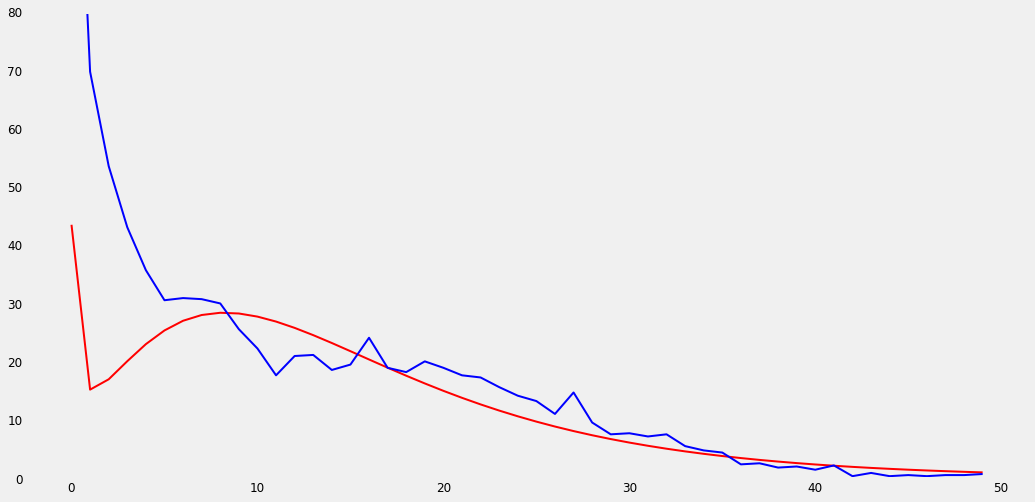

In [970]:
plt.ylim(0,80)
plt.plot(np.exp(make_prediction(best_degree)-1),color='red')
plt.plot(np.exp(y-1),color='blue')

In [944]:
print('Intercept = '+str(MODELS[0][0]))
for i in range(1,6):
    print('Coeff_%.i = '%(i) +str(MODELS[i][0]) )


Intercept = 2.888370481029633
Coeff_1 = 8.025594429787525
Coeff_2 = 1.1046669583930475
Coeff_3 = 11.502305016779598
Coeff_4 = 16.179597158458314
Coeff_5 = 41.869247643686336


$$y=2.73+8.378x+0.166x^2+12.4465x^3+15.54x^4+46.89x^5$$

In [971]:
PERC[RMSE.argmin()]

0.0999023424959954

In [660]:
T=[]
P=[]
for i in range(len(C_YEAR)-1):
    comp_1=c_data[(c_data['Year']>=C_YEAR[i]) & (c_data['Year']<=C_YEAR[i+1])]
    T_I=[]
    P_I=[]
    for j in range(len(C_YEAR)-1):
        comp_2=c_data[(c_data['Year']>=C_YEAR[j]) & (c_data['Year']<=C_YEAR[j+1])][0:len(comp_1)]
        T_I.append(stats.ttest_ind( np.array(comp_1.Sunspot),np.array(comp_2.Sunspot))[0])
        P_I.append(stats.ttest_ind( np.array(comp_1.Sunspot),np.array(comp_2.Sunspot))[1])
    T.append(T_I)
    P.append(P_I)

In [661]:
T_Data=pd.DataFrame()
for y in range(len(C_YEAR)-1):
    T_Data['%s'%(C_YEAR[y])]=T[y]
T_Data.index=C_YEAR[0:len(T_Data)]

In [662]:
P_Data=pd.DataFrame()
for y in range(len(C_YEAR)-1):
    P_Data['%s'%(C_YEAR[y])]=P[y]
P_Data.index=C_YEAR[0:len(T_Data)]

In [663]:
P_Data[P_Data>0.10].fillna('<0.10')

,1823,1833,1843,1856,1867,1878,1889,1901,1913,1923,1933,1944,1954,1964,1976,1986,1996
1823,1,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,0.976768,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10
1833,<0.10,1,<0.10,<0.10,<0.10,0.593764,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10
1843,<0.10,<0.10,1,0.498224,0.714949,<0.10,<0.10,<0.10,<0.10,<0.10,0.521118,<0.10,<0.10,0.124531,<0.10,<0.10,0.218512
1856,<0.10,<0.10,<0.10,1,0.794008,<0.10,<0.10,<0.10,<0.10,<0.10,0.174022,<0.10,<0.10,<0.10,<0.10,0.105643,<0.10
1867,<0.10,<0.10,<0.10,0.794008,1,<0.10,<0.10,<0.10,<0.10,<0.10,0.327529,<0.10,<0.10,<0.10,<0.10,0.177889,<0.10
1878,<0.10,<0.10,<0.10,<0.10,<0.10,1,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10
1889,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,1,<0.10,0.39526,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10
1901,<0.10,<0.10,<0.10,<0.10,<0.10,0.143607,<0.10,1,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10
1913,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,1,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10
1923,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,1,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10,<0.10


In [664]:
T_Data[P_Data>0.10].fillna('Over')

,1823,1833,1843,1856,1867,1878,1889,1901,1913,1923,1933,1944,1954,1964,1976,1986,1996
1823,0,Over,Over,Over,Over,Over,Over,-0.0291217,Over,Over,Over,Over,Over,Over,Over,Over,Over
1833,Over,0,Over,Over,Over,0.53341,Over,Over,Over,Over,Over,Over,Over,Over,Over,Over,Over
1843,Over,Over,0,0.677315,0.36523,Over,Over,Over,Over,Over,-0.641649,Over,Over,-1.53616,Over,Over,-1.23058
1856,Over,Over,Over,0,-0.261117,Over,Over,Over,Over,Over,-1.3595,Over,Over,Over,Over,1.61827,Over
1867,Over,Over,Over,0.261117,0,Over,Over,Over,Over,Over,-0.979157,Over,Over,Over,Over,1.3474,Over
1878,Over,Over,Over,Over,Over,0,Over,Over,Over,Over,Over,Over,Over,Over,Over,Over,Over
1889,Over,Over,Over,Over,Over,Over,0,Over,-0.850163,Over,Over,Over,Over,Over,Over,Over,Over
1901,Over,Over,Over,Over,Over,1.46262,Over,0,Over,Over,Over,Over,Over,Over,Over,Over,Over
1913,Over,Over,Over,Over,Over,Over,Over,Over,0,Over,Over,Over,Over,Over,Over,Over,Over
1923,Over,Over,Over,Over,Over,Over,Over,Over,Over,0,Over,Over,Over,Over,Over,Over,Over


In [665]:
CORR=[]
for y in range(len(C_YEAR)-1):
    corr_perc=1.-sum(P_Data[P_Data>0.10][str(C_YEAR[y])].isna())/17
    CORR.append(corr_perc)

In [666]:
CORR=np.array(CORR)

In [668]:
best_corr_data=data[(data['Year']>=C_YEAR[CORR.argmax()]) & (data['Year']<=C_YEAR[CORR.argmax()+1])]

In [669]:
P_values=P_Data[P_Data>0.10]

In [670]:
NOT_NAN=np.array(P_values['1933'].notna())

In [671]:
P_values=np.array(P_values['1933'])

In [672]:
best_corr_y=C_YEAR[np.where(NOT_NAN==True)]

In [678]:
BEST_Y=[]
for i in range(len(best_corr_y)):
    J_in=best_corr_y[i]
    J_fin=C_YEAR.tolist()[C_YEAR.tolist().index(best_corr_y[i])+1]
    #print(J_in,J_fin)
    BEST_Y.append(np.array(data[(data['Year']>=J_in) & (data['Year']<=J_fin)].Sunspot))

([<matplotlib.axis.XTick at 0x7fe631cbae20>,
 [Text(0, 0, '0'),
  Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '14'),
  Text(0, 0, '15'),
  Text(0, 0, '16'),
  Text(0, 0, '17'),
  Text(0, 0, '18'),
  Text(0, 0, '19'),
  Text(0, 0, '20'),
  Text(0, 0, '21')])

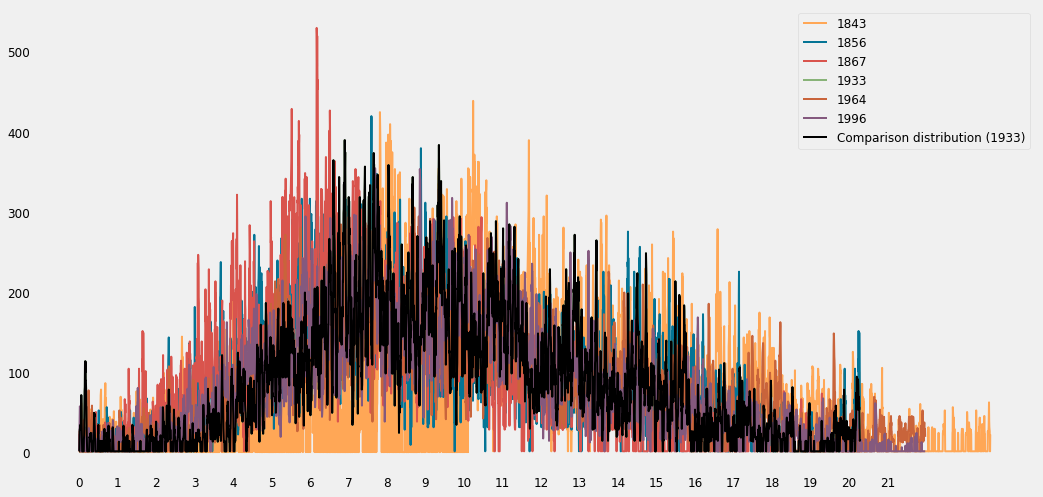

In [676]:
COLORS=[colors[0],colors[1],colors[2],colors[3],colors[4],colors[5],colors[6]]
for i in range(len(BEST_Y)):
    
    plt.plot(BEST_Y[i],color=COLORS[i],label='%s'%(str(best_corr_y[i])))
plt.plot(np.array(best_corr_data.Sunspot),color='k',label='Comparison distribution (1933)')
plt.legend()
plt.xticks(np.arange(0,4752,216),np.arange(0,22,1))

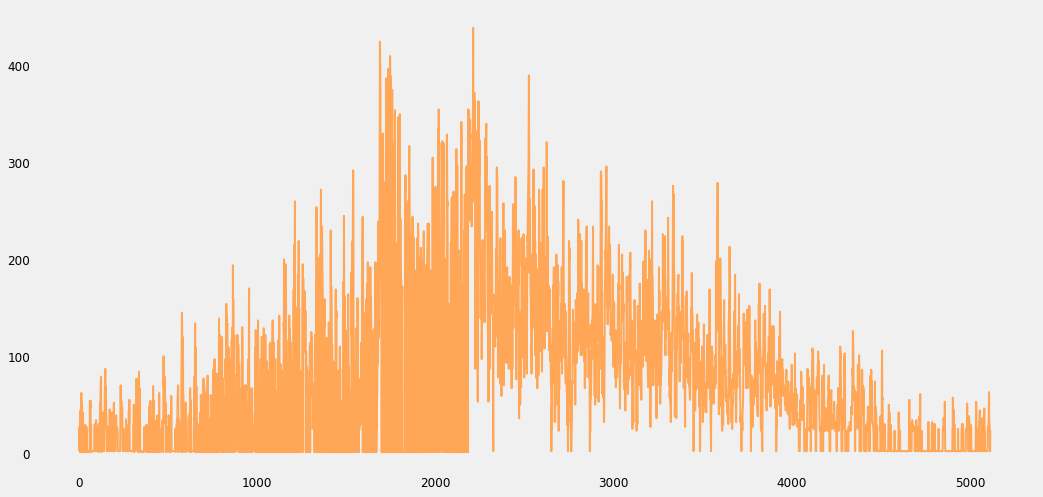

In [674]:
i=0
plt.plot(BEST_Y[i],color=COLORS[i],label='%s'%(str(best_corr_y[i])))


In [723]:
len(best_corr_data)

4383

([<matplotlib.axis.XTick at 0x7fe620632550>,
 [Text(0, 0, '0'),
  Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '14'),
  Text(0, 0, '15'),
  Text(0, 0, '16'),
  Text(0, 0, '17'),
  Text(0, 0, '18'),
  Text(0, 0, '19'),
  Text(0, 0, '20'),
  Text(0, 0, '21')])

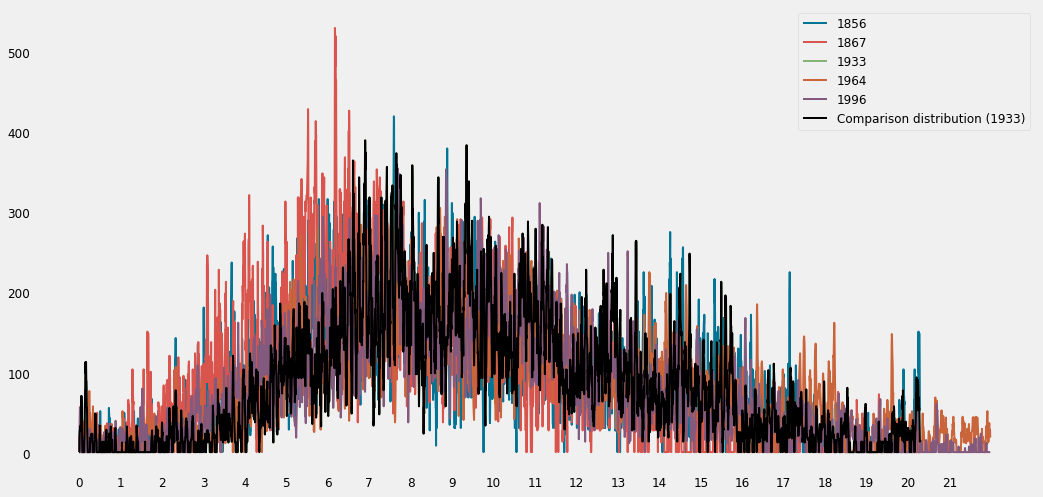

In [679]:
COLORS=[colors[0],colors[1],colors[2],colors[3],colors[4],colors[5],colors[6]]
for i in range(1,len(BEST_Y)):
    
    plt.plot(BEST_Y[i],color=COLORS[i],label='%s'%(str(best_corr_y[i])))
plt.plot(np.array(best_corr_data.Sunspot),color='k',label='Comparison distribution (1933)')
plt.legend()
plt.xticks(np.arange(0,4752,216),np.arange(0,22,1))